<h1>Machine Learning and Statistics</h1>
<h2>Evaluation of Keras Timeseries Anomaly Detection Notebook </h2>
<h3>Conor McCaffrey, G00286552</h3>

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

<h3> Table of Contents: </h3>

1. [Introduction](#introduction)
    * [What are TensorFlow and Keras?](#kt)
    * [The NAB Dataset](#nab)


2. [Load in our Dataset](#work)
    * [Loading Up](#load)
    * [Inspecting our 'no anomaly' Dataset](#noam)
    * [Inspecting our 'Anomaly' Dataset](#am)


3. [Preprocessing](#prep)
    * [Loading Up](#load)
    * [Inspecting our 'no anomaly' Dataset](#noam)
    * [Inspecting our 'Anomaly' Dataset](#am)


    
4. [References](#ref)

***

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks aka machine learning/deep learning models and algorithms (See below for explanation of TensorFlow)
import tensorflow.keras as keras

# Plotting using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

  <a name="introduction"></a>
<h1>Introduction</h1>

<a name="kt"></a>
<h3>So, what are Tensorflow and Keras?</h3>   


Out of all our imported packages, Tensorflow and Keras stand out as we have not enoucntered them before in general use. Tensorflow is essentially a library containing a range of machine-learning/deep-learning models and algorithms that can be leveraged using programs such as Python [1]. TensorFlow 2.0, the most recent update, leverages the simplicity of Keras API to facilitate ease-of-use [1].  


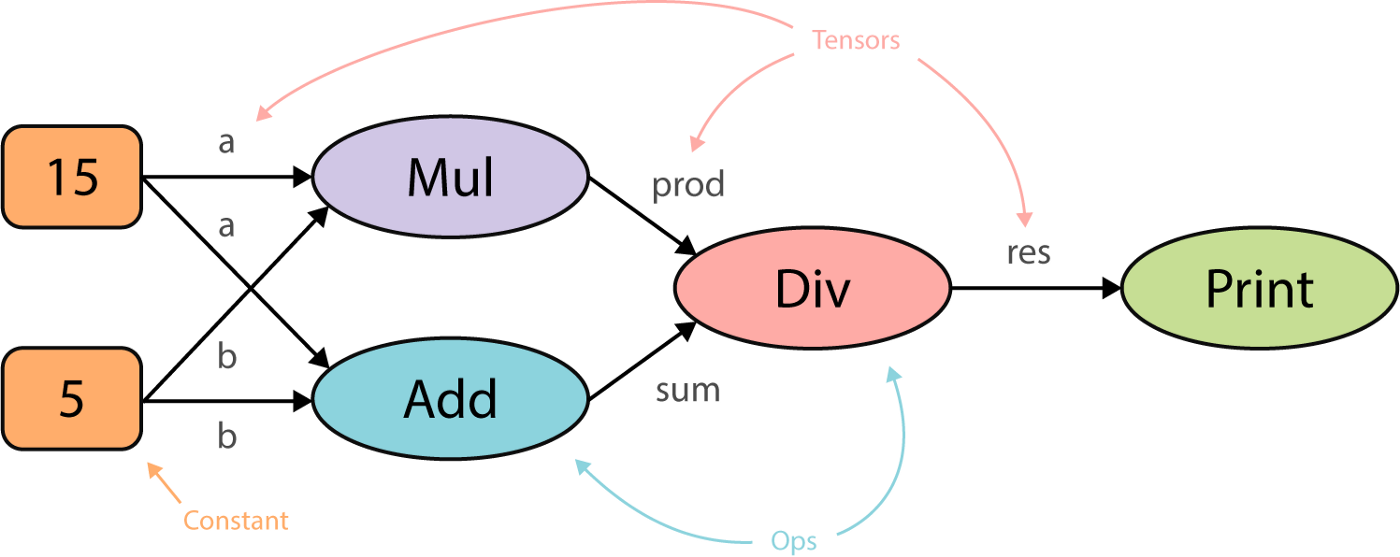
<center><b>Figure 1:</b> Overview of nodes in TensorFlow. Adapted from Reference 2</center>

The above diagram is known as a <b>computational graph</b>, basically a 'directed-flowchart' or graph, depicting computations in an operation. [2] This graph contains 'nodes' and edges, representing variables or operations [2]. Operations, just like in any program, can manipulate data (or variables) to whatever end the user wishes. The end result (or output) of one node is then used as the input to another node (or operation) to facilitate downstream processing.

Let's examine the above graph (Figure 1) a little closer. We have two constants, <i>a</i> and <i>b</i>. We perform a series of operations using these constants, first by multiplying them and adding them together. We then proceed to divide the product of these two operations and print the result. This series of operations is much easier to convey visually than by explaining through written procedures. 

Tradtionally, the complexity of major frameworks has been a hinderence to their use by users in machine learning [3]. Keras, constructed in Python, is a response to this complexity. Keras is basically designed to be simple, with the API “designed for human beings, not machines" [3]. Keras is supportewd by Google, Microsoft and Amazon, among others [3]. The idea is that Keras allows the user to easily define a neural network, and the TensorFlow enters the fray to build this defined neural network [4].  The 'Model' is the core Keras data structure [3]. There are two types of model in Keras: Sequential and Functional API [3]. Sequential lets you build a model in single layers, with single lines of code all that is needed for certain steps [3,4]. Functional API supports arbitrary model architectures (in contrast to Sequential which is limited to single-input, single-output layers) permitting multi-input/output models, is more flexible but naturally much more complex (Figure 2) [3-5].

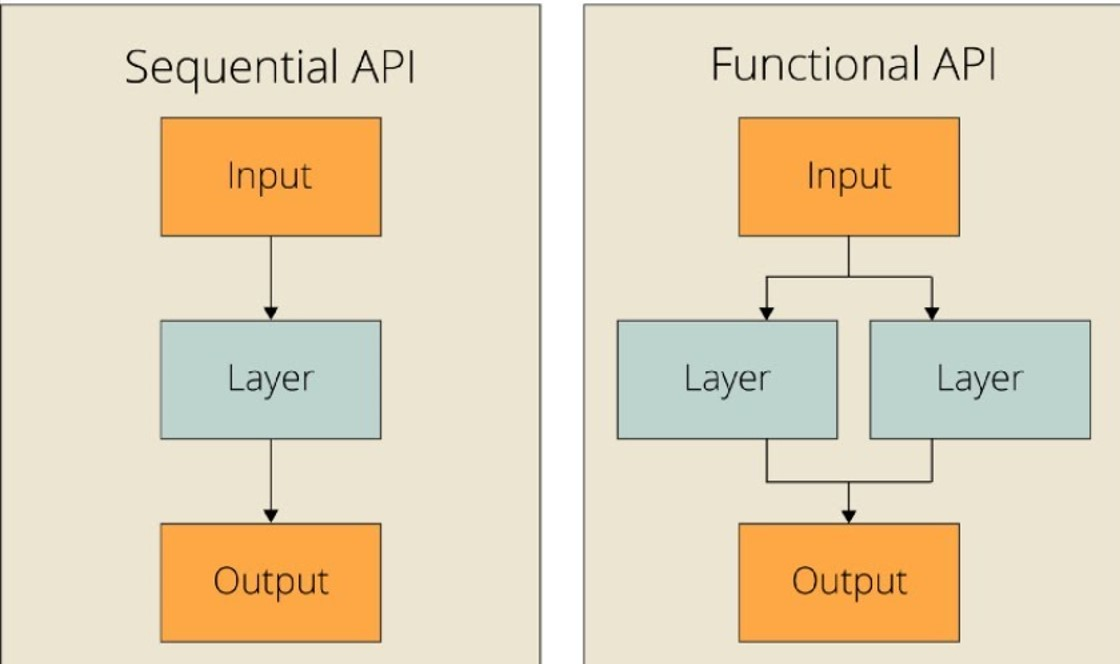
<center><b>Figure 2:</b> APIs in Keras. Adapted from Reference 5</center>

<a name="nab"></a>
<h3>The NAB Dataset</h3> 

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

The Numenta Anomaly Benchmark (NAB) is an open-source set of data files that can be used by different anomaly detection algorithms to determine their effectiveness [6]. The dataset was made available in 2015, and is composed of 58 labeled timeseries data files [7]. The data is retrieved from real-world sources such as Amazon Web Services (AWS), Twitter, New York traffic data and other sources [6-8]. The NAB dataset also contains a scoring mechanism to allow easy comparison between detection algorithms [6]. Anomaly detection has applications in real-world scenarios such as fraud detection, tumour detection in medical imaging and even errors in written text [9].

 <a name="work"></a>
<h1>Load in Our Datasets</h1>

<a name="load"></a>
<h3>Loading Up</h3>  

Let's begin by loading in and inspecting our datasets. 

In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [3]:
# let's confirm the URL of our 'no anomaly' dataset
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
# let's confirm the URL of our 'anomaly' dataset
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [5]:
# Let's read in our dataset using pandas csv function
# parse_dates is used for inferring timestamps, converting it to datetime types
# if we dont use parse_dates, data will be read in as a string [10]

# set the 'timestamp' column as the index

df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [6]:
# Let's read in our dataset using pandas csv function
# parse_dates is used for inferring timestamps, converting it to datetime types
# if we dont use parse_dates, data will be read in as a string [10]

# set the 'timestamp' column as the index
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

<a name="noam"></a>
<h3>Inspecting our 'no anomaly' Dataset</h3>

In [7]:
# Let's print the first 5 rows of our dataset
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [8]:
# Let's print the last 5 rows of our dataset
df_small_noise.tail()

,value
timestamp,
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127
2014-04-14 23:50:00,21.798801
2014-04-14 23:55:00,18.682620


In [9]:
# Let's have a glance at the makeup of our dataset
df_small_noise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-04-01 00:00:00 to 2014-04-14 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [10]:
# To check null values row-wise
df_small_noise.isnull().sum()

value    0
dtype: int64

So we can see we have one column (outside of the index), and that we have no NULL values and all values are of type float. What is interesting is that we now know our dataset covers a 2-week period as shown in the 'DatetimeIndex' row.

In [11]:
# Let's look at the essentials of our dataset
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


So our minimum value is 18.000964 and our maximum value is 87.976128 with the average value being 42.438353. 

In [12]:
# Let's pick a random value for some error-checking
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [13]:
# Example of taking just the value and no extra info
df_small_noise.iloc[0]['value']

18.3249185392

In [14]:
# Same as above, just another way to perform the operation 
df_small_noise.iloc[0].values[0]

18.3249185392

In [15]:
# Let's pick a random value for some error-checking (final value)
df_small_noise.iloc[-1]

value    18.68262
Name: 2014-04-14 23:55:00, dtype: float64

An interesting observation here is that the value printed above has 5 figures after the decimal place whereas the result from calling the tail() function above has six figures after the decimal point. Let's investigate. 

In [16]:
# Lets isolate and print the final value to compare with previous results
df_small_noise.iloc[-1].values[-1]

18.6826203655

That's interesting, both the tail() and iloc[] methods have truncated our values. In the sector I work in, this brings in the possibility of 'double-rounding', which is against best practice and can lead to errors in reporting data. This is good to know in advance. 

In [17]:
# Lets look at the shape of our dataset
df_small_noise.shape

(4032, 1)

As expected, we have one column (outside of the index) and 4032 rows in our dataset. 

Let's go ahead and plot this data to have a look. Remember, this dataset should not have any anomalies so should be consistent across the board. 

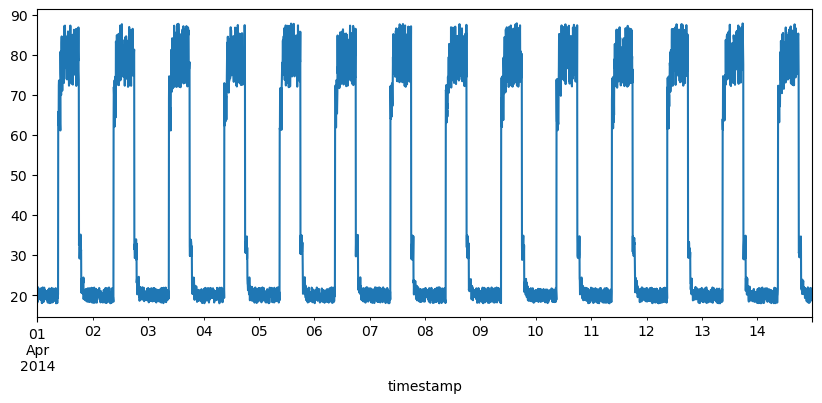

In [18]:
# plotting using matplotlib and seaborn

fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);


In [19]:
# Lets split our data into two groups and plot using Seaborn
dffirstHalf = df_small_noise[:2016]
dffirstHalf

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120
...,...
2014-04-07 23:35:00,18.647021
2014-04-07 23:40:00,20.805385
2014-04-07 23:45:00,21.039511


In [20]:
# Lets split our data into two groups and plot using Seaborn
dfsecondHalf = df_small_noise[2016:]
dfsecondHalf

,value
timestamp,
2014-04-08 00:00:00,21.258500
2014-04-08 00:05:00,21.744652
2014-04-08 00:10:00,20.054071
2014-04-08 00:15:00,21.801117
2014-04-08 00:20:00,20.142756
...,...
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127


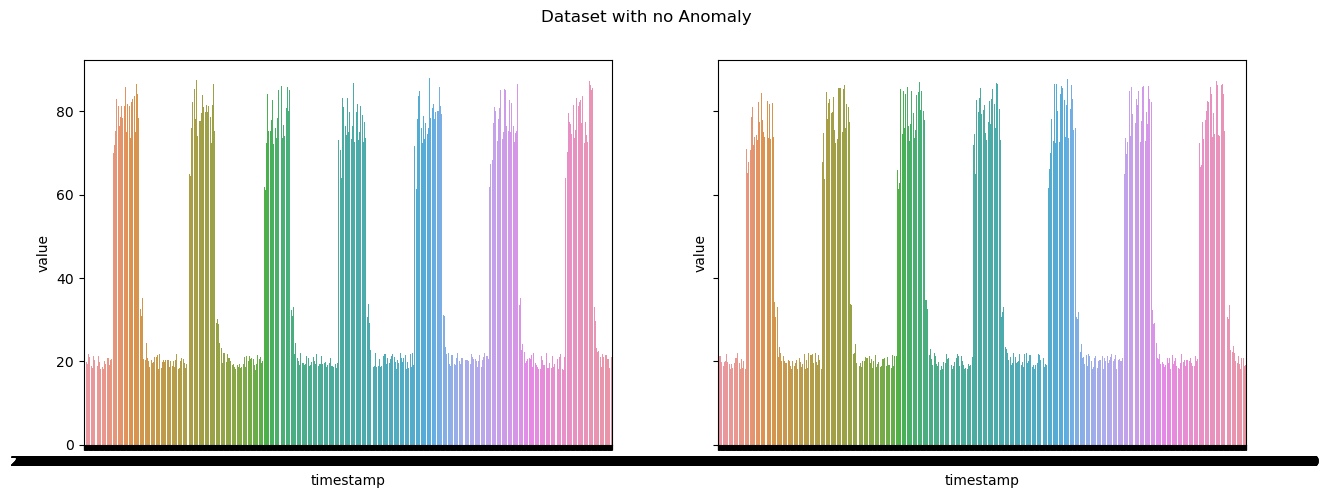

In [21]:
# Lets plot this using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Dataset with no Anomaly')

# dffirstHalf
sns.barplot(ax=axes[0], x=dffirstHalf.index, y=dffirstHalf.value);

# dfsecondHalf
sns.barplot(ax=axes[1], x=dfsecondHalf.index, y=dfsecondHalf.value);


<a name="am"></a>
<h3>Inspecting our 'Anomaly' Dataset</h3>

In [22]:
# Let's print the first 5 rows of our dataset
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [23]:
# Let's print the final 5 rows of our dataset
df_daily_jumpsup.tail()

,value
timestamp,
2014-04-14 23:35:00,18.074649
2014-04-14 23:40:00,21.002014
2014-04-14 23:45:00,20.566713
2014-04-14 23:50:00,18.254193
2014-04-14 23:55:00,21.863147


In [24]:
# Let's have a glance at the makeup of our dataset
df_daily_jumpsup.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-04-01 00:00:00 to 2014-04-14 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [25]:
# To check null values row-wise
df_daily_jumpsup.isnull().sum()

value    0
dtype: int64

So we can see we have one column (outside of the index), and that we have no NULL values and all values are of type float. What is interesting is that we now know our dataset covers a 2-week period as shown in the 'DatetimeIndex' row.

In [26]:
# Lets look at the essentials of our dataset
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


We can see we have 4032 vlaues, similar to our 'no anomaly' dataset. Our minimum value is 18.001010 and our maximum value is 164.947481. Our average value is 44.494254. 

In [27]:
# Let's inspect our first value
df_daily_jumpsup.iloc[0]['value']

19.761251903

Once again we can see how our full value has been truncated. When using the head() function above, we have 6 figures after the decimal point whereas here we have 9. 

In [28]:
# Lets look at the shape of our data
df_daily_jumpsup.shape

(4032, 1)

As expected, we have a similar shape to our 'no anomaly' dataset. 

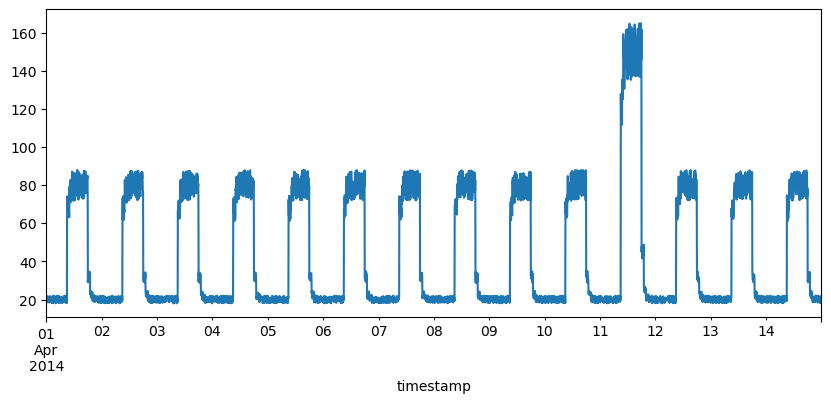

In [29]:
# Now let's plot our dataset that contains the anomaly
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

We can immediately see our anomaly here, this was also obvious when we called the describe() method as the maximum value was so much greater than the average value. 

  <a name="introduction"></a>
<h1> Preprocessing </h1>

***

In [30]:
# Let's get the mean of our 'no anomaly' data
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

This is the same as we got above - a good sign.

In [31]:
# Let's get the standard deviation of our 'no anomaly' data
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

This is also the same as we got above - a good sign.

In [95]:
# Let's normalise our values between -0.8 and 1.62 and center on 0. 
# this is more important in datasets with a wide range of values
df_train_vals = (df_small_noise - train_mean) / train_std

In [96]:
# Print the first 5 rows of our training values
df_train_vals.head()

,div_std,less_mean,value
timestamp,,,
2014-04-01 00:00:00,NaN,NaN,-0.858829
2014-04-01 00:05:00,NaN,NaN,-0.728993
2014-04-01 00:10:00,NaN,NaN,-0.848148
2014-04-01 00:15:00,NaN,NaN,-0.729586
2014-04-01 00:20:00,NaN,NaN,-0.731173


In [97]:
# Lets have a closer look at our training values
df_train_vals.describe()

,div_std,less_mean,value
count,0.0,0.0,4.032000e+03
mean,NaN,NaN,-2.616541e-15
std,NaN,NaN,1.000000e+00
min,NaN,NaN,-8.703666e-01
25%,NaN,NaN,-8.048176e-01
50%,NaN,NaN,-7.418804e-01
75%,NaN,NaN,1.175759e+00
max,NaN,NaN,1.621882e+00


We can see our maximum value is 1.621882 and our minimum value is -0.8703666.  

In [34]:
# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [35]:
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [36]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [37]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

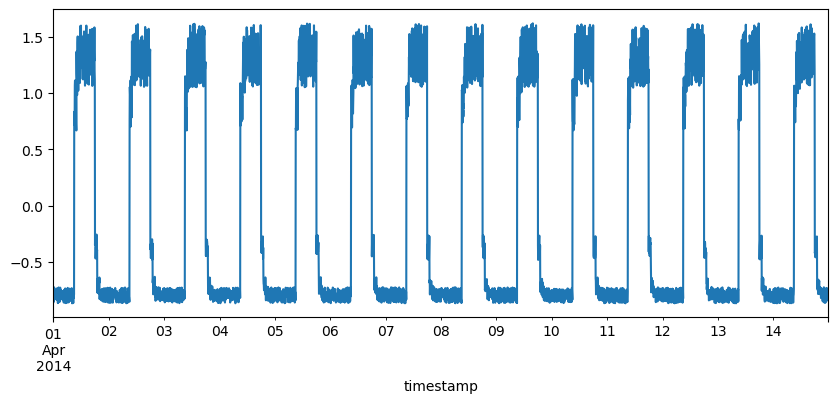

In [38]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [98]:
# Lets look at the shape of our training values
df_train_vals.shape

(4032, 3)

In [40]:
# 
window_size = 288

Window example:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [41]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [42]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [43]:
# Remove brackets.
len(L) - win_size + 1

10

In [44]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [45]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [46]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [47]:
# 
def windows(vals, N=window_size):
  # 
  L = []
  # 
  for i in range(len(vals) - N + 1):
    # 
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

In [48]:
# 
x_train = windows(df_train_vals)

In [49]:
# 
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [50]:
# 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [51]:
# 
x_train.shape

(3745, 288, 1)

In [52]:
#
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [53]:
# 
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

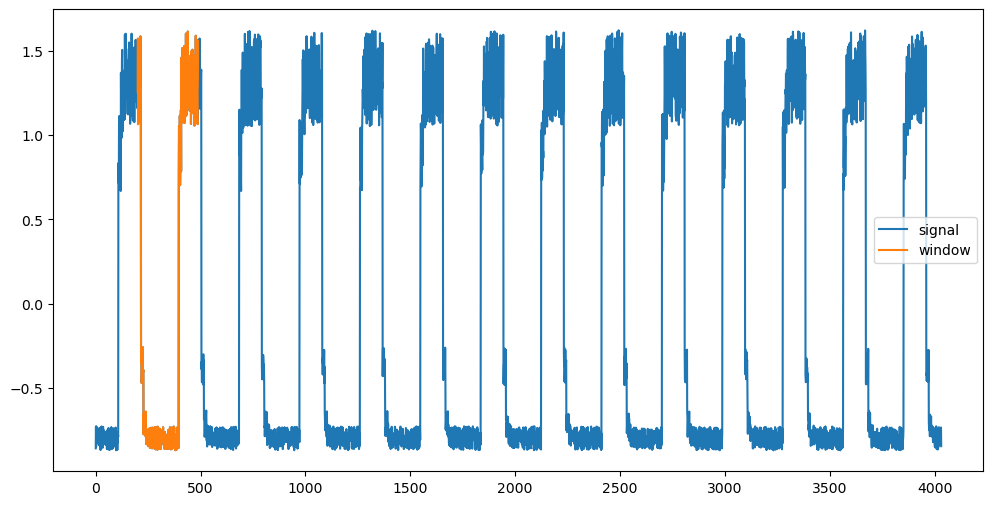

In [54]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

## Neural Network

***

In [55]:
x_train.shape

(3745, 288, 1)

In [56]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [57]:
#
model = keras.Sequential(layers)

In [58]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [59]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [61]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 64ms/step - loss: 0.7011 - val_loss: 0.5445
Epoch 2/50
27/27 [==============================] - 1s 53ms/step - loss: 0.2941 - val_loss: 0.0670
Epoch 3/50
27/27 [==============================] - 2s 71ms/step - loss: 0.0652 - val_loss: 0.0385
Epoch 4/50
27/27 [==============================] - 2s 65ms/step - loss: 0.0513 - val_loss: 0.0338
Epoch 5/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0452 - val_loss: 0.0310
Epoch 6/50
27/27 [==============================] - 1s 51ms/step - loss: 0.0405 - val_loss: 0.0296
Epoch 7/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0366 - val_loss: 0.0282
Epoch 8/50
27/27 [==============================] - 1s 56ms/step - loss: 0.0334 - val_loss: 0.0275
Epoch 9/50
27/27 [==============================] - 1s 52ms/step - loss: 0.0311 - val_loss: 0.0279
Epoch 10/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0291 - val_loss: 0.0282
Epoch 11/

## Evaluation

***

In [62]:
history.history["loss"]

[0.7010955214500427,
 0.29405874013900757,
 0.06521499156951904,
 0.051326900720596313,
 0.045166902244091034,
 0.040515463799238205,
 0.03661210462450981,
 0.0333634689450264,
 0.031064460054039955,
 0.029090164229273796,
 0.02749173529446125,
 0.02591468021273613,
 0.024669669568538666]

In [63]:
history.history["val_loss"]

[0.5444501042366028,
 0.06695929169654846,
 0.03852571174502373,
 0.03382730484008789,
 0.030973998829722404,
 0.029608655720949173,
 0.02823537215590477,
 0.027521926909685135,
 0.02792205847799778,
 0.02819092571735382,
 0.027688903734087944,
 0.028014428913593292,
 0.028244826942682266]

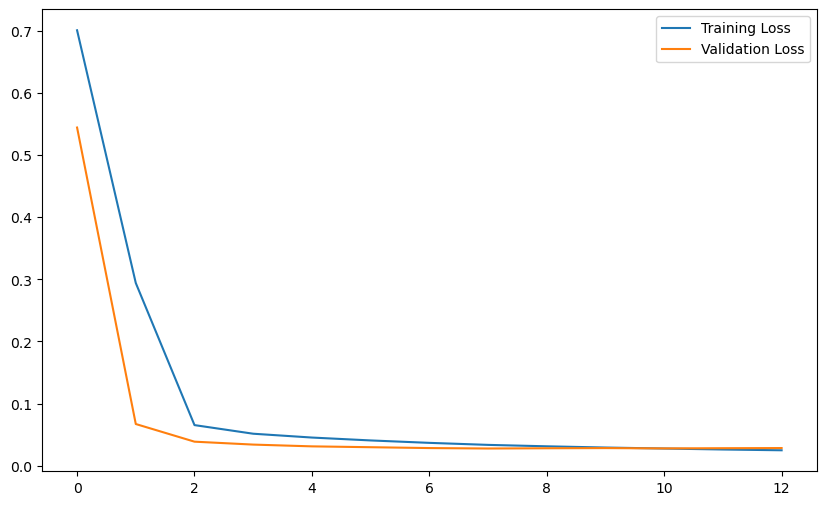

In [64]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [65]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 8ms/step


In [66]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

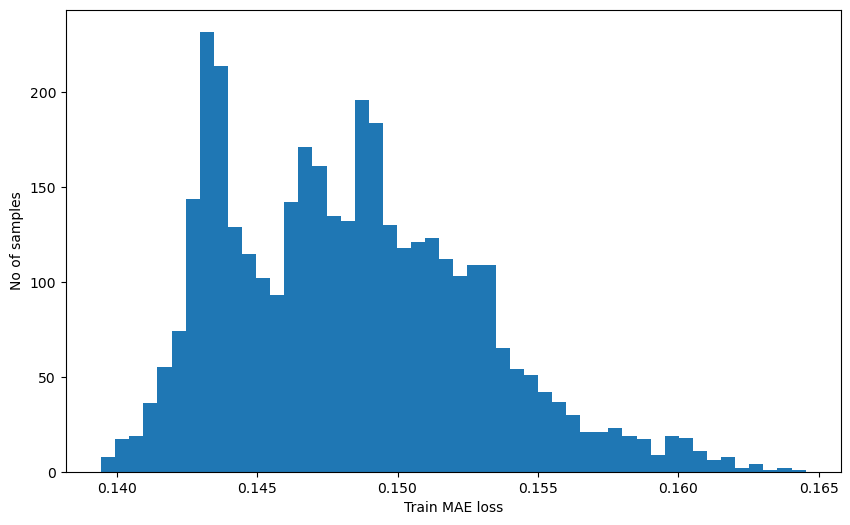

In [67]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [68]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.16453542055377038

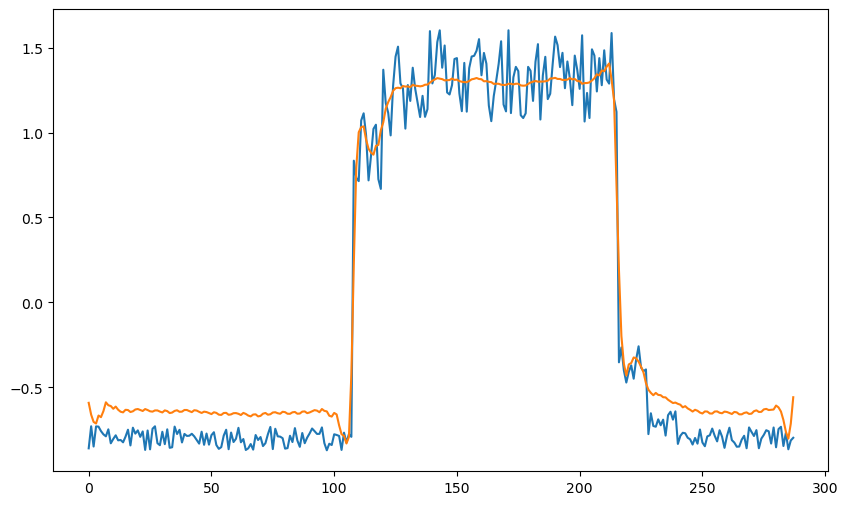

In [69]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [70]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

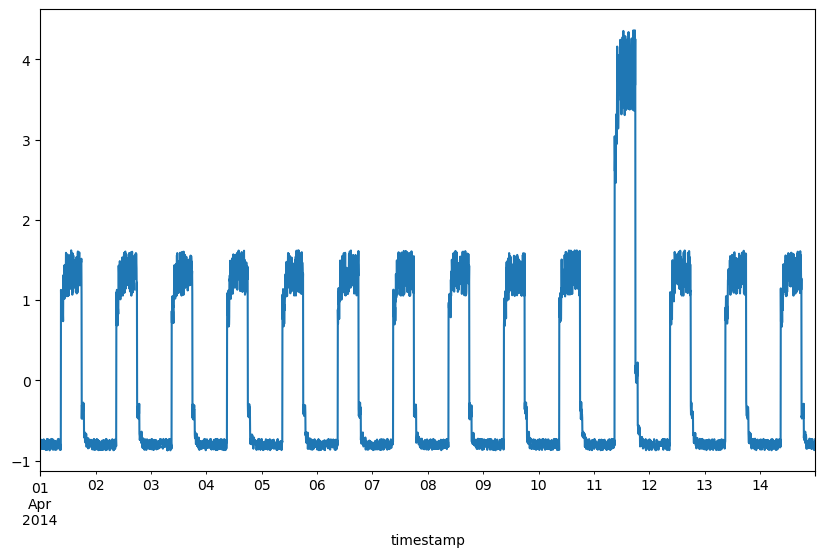

In [71]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [72]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [73]:
# 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 8ms/step


In [74]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.14508824],
       [0.14391888],
       [0.14741588],
       ...,
       [0.14576833],
       [0.1448734 ],
       [0.14514754]])

In [75]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.14508824, 0.14391888, 0.14741588, ..., 0.14576833, 0.1448734 ,
       0.14514754])

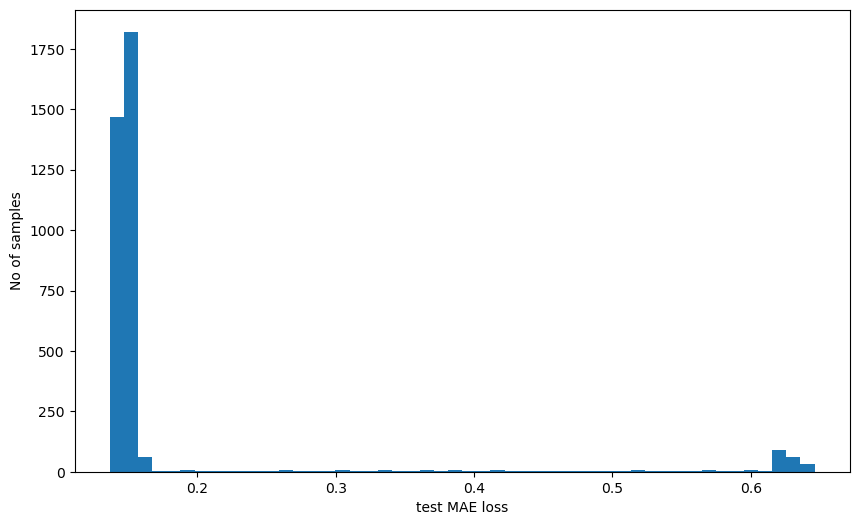

In [76]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [77]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

393

In [78]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [79]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

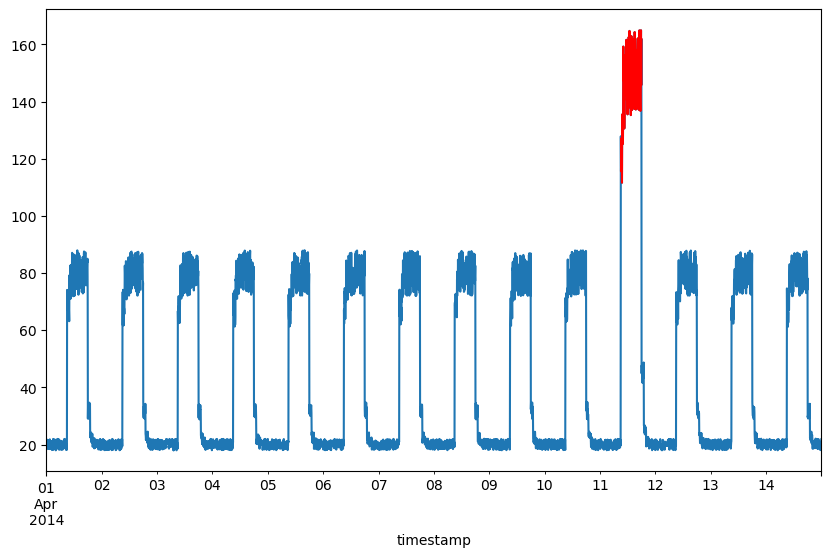

In [80]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

<h2>References</h2> <a name="ref"></a>


1. https://www.infoworld.com/article/3278008/what-is-tensorflow-the-machine-learning-library-explained.html

2. https://d3lm.medium.com/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

3. https://www.infoworld.com/article/3336192/what-is-keras-the-deep-neural-network-api-explained.html

4. https://www.activestate.com/resources/quick-reads/what-is-a-keras-model/#:~:text=Keras%20is%20a%20neural%20network,built%20for%20you%20by%20TensorFlow.

5. https://www.analyticsvidhya.com/blog/2022/04/predicting-house-prices-using-keras-functional-api/

6. N. Singh and C. Olinsky, "Demystifying Numenta anomaly benchmark," 2017 International Joint Conference on Neural Networks (IJCNN), 2017, pp. 1570-1577, doi: 10.1109/IJCNN.2017.7966038.

7. https://www.kaggle.com/datasets/boltzmannbrain/nab

8. Ahmad, S., Lavin, A., Purdy, S., & Agha, Z. (2017). Unsupervised real-time anomaly detection for streaming data. Neurocomputing, Available online 2 June 2017, ISSN 0925-2312, https://doi.org/10.1016/j.neucom.2017.04.070

9. https://curiousily.com/posts/anomaly-detection-in-time-series-with-lstms-using-keras-in-python/

10. https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e

11. 


***

## End